# 훈련셋 그래프로 그려보기 

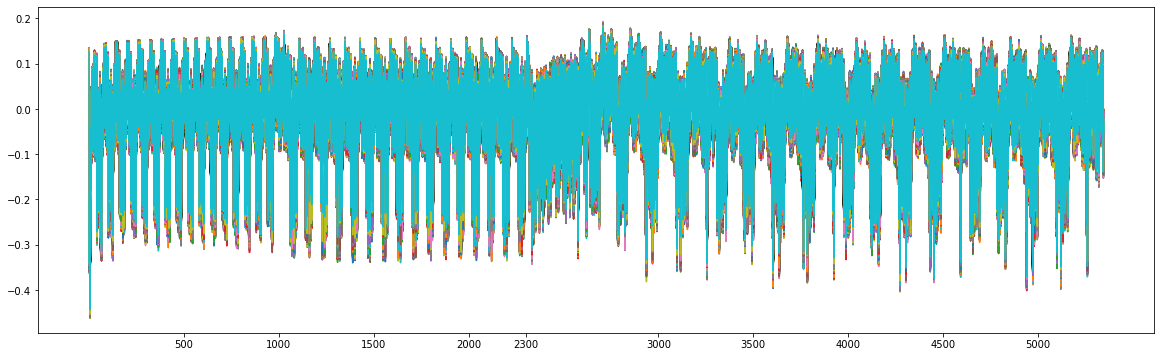

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model, to_categorical
import tensorflow as tf
from tensorflow import keras


Sbox = np.array([
	0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
	0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
	0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
	0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
	0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
	0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
	0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
	0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
	0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
	0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
	0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
	0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
	0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
	0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
	0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
	0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16 ])

# 3-Round trace 그래프 그려보기 

x_train = np.load('/content/drive/MyDrive/AES_Train/AES_3Round_train_trace_10000tr_5348p.npy')

x = np.arange(5348)
plt.figure(figsize=(20,6))
plt.xticks([500, 1000, 1500, 2000, 2300, 3000, 3500, 4000, 4500, 5000])
for i in range(10000):
	plt.plot(x, x_train[i])
plt.show()


공격 구간은 SubBytes 1000point ~ 2400point

# 데이터 정규화

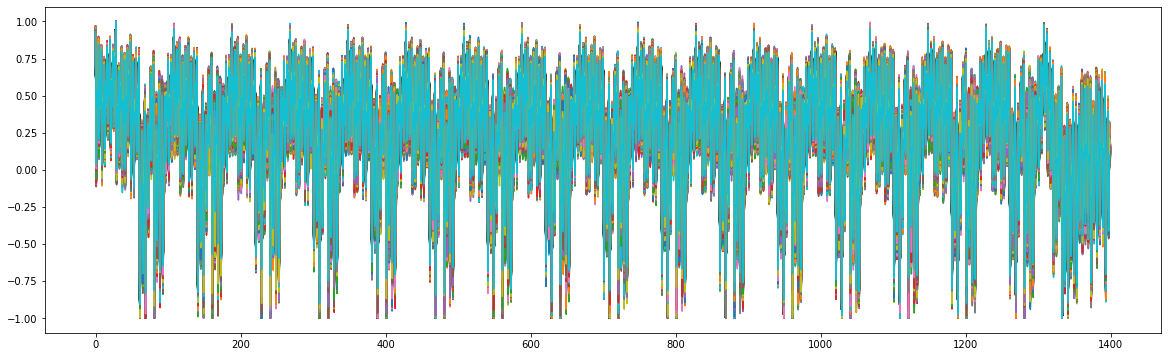

In [2]:
# 정규화
# 딥러닝 모델이 잘 학습할 수 있도록 입력 데이터의 전처리를 수행
# 상이한 스케일을 가진 데이터를 입력하면 스케일이 큰 속성에 영향을 많이 미치는 경우가 발생
# x_train_trace = np.load('/content/drive/MyDrive/AES_Train/AES_3Round_train_trace_10000tr_5348p.npy')

# 3라운드 SubBytes 부분으로 다 나누기
x_train_subbytes = np.array(x_train[:])[:, 1000:2400]

# Min-Max Normalization
# data의 모든 feature들을 0과 1 사이의 scaling로 변환
# https://en.wikipedia.org/wiki/Feature_scaling
for i in range(10000):
  x_train_subbytes[i] -= x_train_subbytes[i].mean()
  x_min = min(x_train_subbytes[i])
  x_max = max(x_train_subbytes[i])
  x_train_subbytes[i] = ((x_train_subbytes[i] - x_min)/(x_max - x_min)) * 2 - 1

# 정규화 그래프 그리기
x_ = np.arange(1400)
plt.figure(figsize=(20,6))
for i in range(10000):
	plt.plot(x_, x_train_subbytes[i])
plt.show()



# 인공 신경망 

In [3]:
plain = np.load('/content/drive/MyDrive/AES_Train/AES_3Round_train_trace_10000tr_5348p_3Round_input.npy')
key = np.load('/content/drive/MyDrive/AES_Train/AES_3Round_train_trace_10000tr_5348p_3Round_key.npy')

# 학습 데이터 가공 
plain = plain.astype(int)
key = key.astype(int)
sbox = Sbox[plain ^ key]

# 데이터 섞기
rand_index = np.arange(0, 10000)
np.random.shuffle(rand_index)
x = x_train_subbytes[rand_index[:]]
y = sbox[rand_index[:]]

# 공격 부분
# 찾아야하는 부분 : 0, 2, 4, 6, 8, 10, 12, 14
target = 0

# 원핫 인코딩
category = keras.layers.CategoryEncoding(256, output_mode = 'one_hot')
y_onehot = category(y[:, target])

model = Sequential([
  Dense(256, input_dim=1400, activation='softplus'),
	# Dense(256, activation='softplus'),
  Dense(256, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

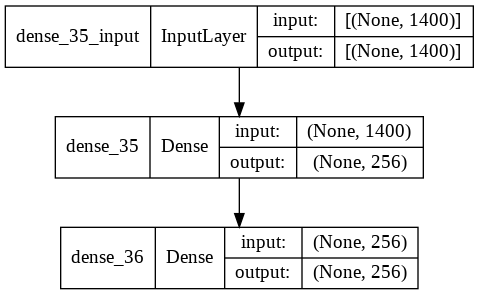

In [ ]:
plot_model(model, show_shapes=True)

In [4]:
checkpoint_callback = ModelCheckpoint("best_model.h5", 
                                      save_best_only=True, 
                                      monitor="val_loss")

hist = model.fit(x, y_onehot,

validation_split=0.05,

batch_size=32,

epochs=200,

callbacks=[checkpoint_callback])



Epoch 1/200
297/297 [==============================] - 3s 7ms/step - loss: 5.5704 - accuracy: 0.0039 - val_loss: 5.5503 - val_accuracy: 0.0040
Epoch 2/200
297/297 [==============================] - 2s 7ms/step - loss: 5.5475 - accuracy: 0.0033 - val_loss: 5.5584 - val_accuracy: 0.0040
Epoch 3/200
297/297 [==============================] - 2s 7ms/step - loss: 5.5432 - accuracy: 0.0052 - val_loss: 5.5724 - val_accuracy: 0.0040
Epoch 4/200
297/297 [==============================] - 2s 7ms/step - loss: 5.5334 - accuracy: 0.0067 - val_loss: 5.5456 - val_accuracy: 0.0060
Epoch 5/200
297/297 [==============================] - 2s 7ms/step - loss: 5.4954 - accuracy: 0.0087 - val_loss: 5.4973 - val_accuracy: 0.0040
Epoch 6/200
297/297 [==============================] - 2s 7ms/step - loss: 5.3971 - accuracy: 0.0124 - val_loss: 5.3727 - val_accuracy: 0.0140
Epoch 7/200
297/297 [==============================] - 2s 7ms/step - loss: 5.2457 - accuracy: 0.0155 - val_loss: 5.2353 - val_accuracy: 0.0140

# 학습 결과 시각화

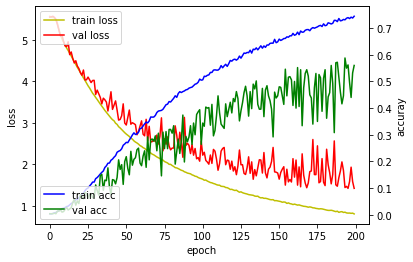

In [5]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')


acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')


loss_ax.set_xlabel('epoch')

loss_ax.set_ylabel('loss')

acc_ax.set_ylabel('accuray')


loss_ax.legend(loc='upper left')

acc_ax.legend(loc='lower left')


plt.show()

# 공격 데이터 셋 확인

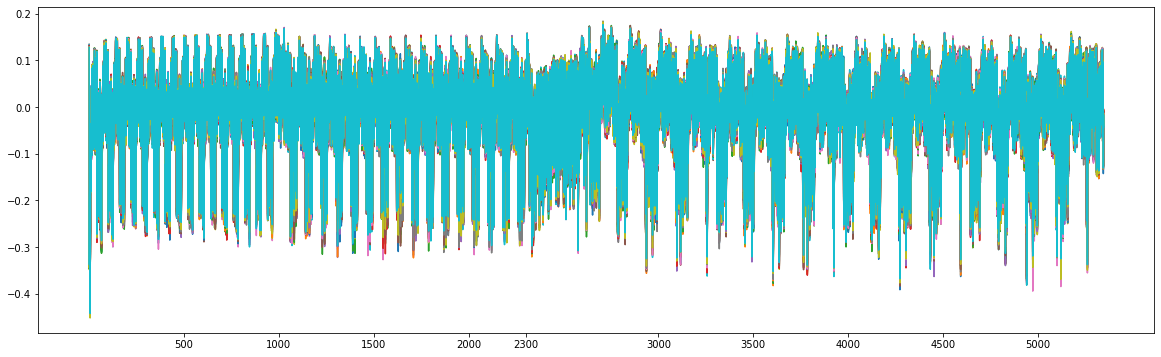

In [6]:
attack = np.load("/content/drive/MyDrive/AES_Attack/AES_3Round_attack_trace_30tr_5348p.npy")
attack_plain = np.load("/content/drive/MyDrive/AES_Attack/AES_3Round_attack_trace_30tr_5348p_3Round_input.npy")

invsbox = np.array([
    0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
    0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
    0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
    0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
    0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
    0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
    0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
    0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
    0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
    0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
    0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
    0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
    0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
    0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
    0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
])

# 3-Round trace 그래프 그려보기 
x = np.arange(5348)
plt.figure(figsize=(20,6))
plt.xticks([500, 1000, 1500, 2000, 2300, 3000, 3500, 4000, 4500, 5000])
for i in range(30):
	plt.plot(x, attack[i])
plt.show()




# 공격 데이터 정규화

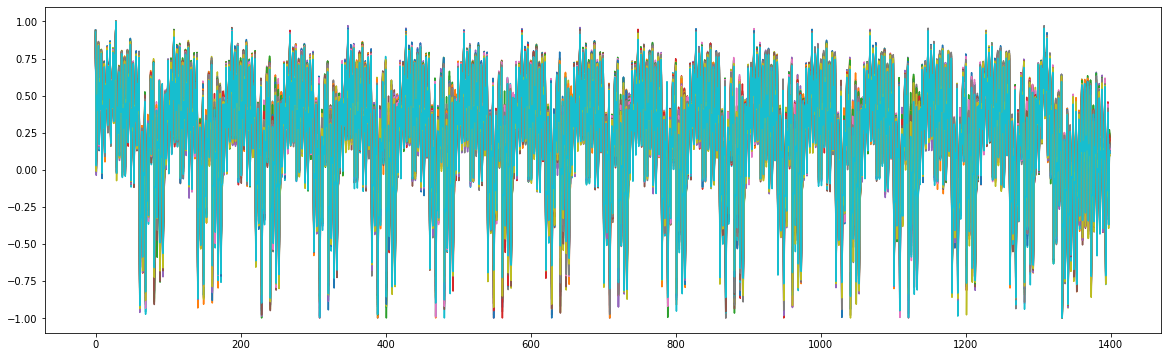

In [7]:
# Subbyte 부분
x_test = np.array(attack[:])[:, 1000:2400]

# 정규화 
for i in range(30):
  x_test[i] -= x_test[i].mean()
  x_min = min(x_test[i])
  x_max = max(x_test[i])
  x_test[i] = ((x_test[i] - x_min)/(x_max - x_min) - 0.5) * 2

x_ = np.arange(1400)
plt.figure(figsize=(20,6))
for i in range(30):
	plt.plot(x_, x_test[i])
plt.show()


# 3라운드 키 예측하기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


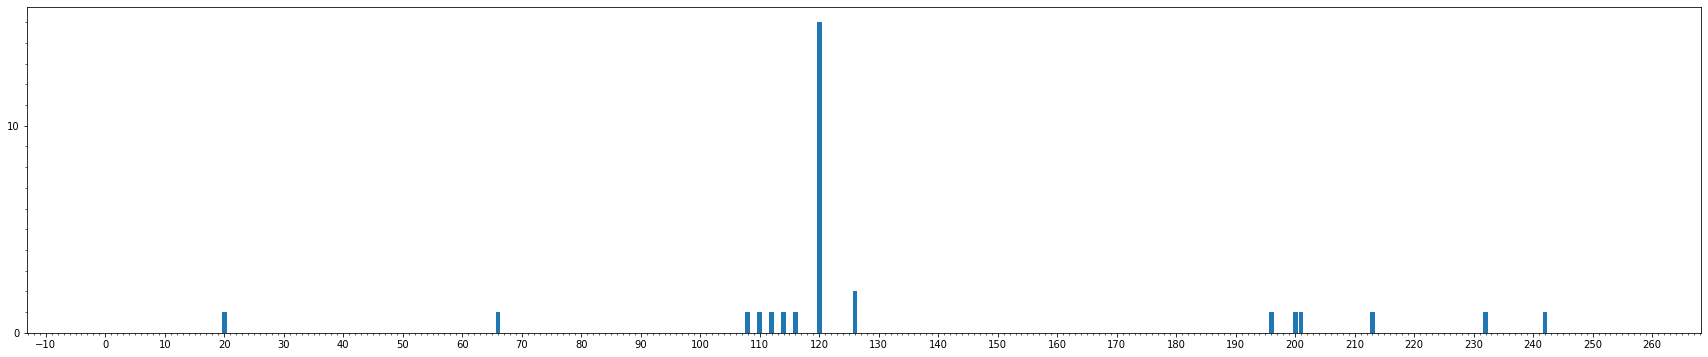

In [29]:
# from scipy.stats import mode
import matplotlib.ticker as ticker
model = load_model("best_model.h5")
y = model.predict(x_test)

# 예측한 값은 무엇인가?
# 예측한 값은 sbox 출력 
# sbox 출력을 되돌려야 한다 
sbox_output = np.argmax(y, axis = 1)
sbox_input = invsbox[sbox_output.astype(int)]

key = np.array([])
for i in range(0, 30):
  guess_key = sbox_input[i] ^ attack_plain[i][target]
  key = np.append(key, np.array([guess_key]))

recomend = [0] * 256
for i in range(0, 30):
  recomend[int(key[i])] += 1

plt.figure(figsize=(30,6))
plt.bar(np.arange(0, 256), recomend)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.show()

0번째 Key는 120으로 예측된다.